## Визуализация на тему:
## "Динамика загрязнения окружающей среды"

### Импортируем необходимые библиотеки

In [14]:
from matplotlib import pyplot as plt
from IPython.display import display
from matplotlib.ticker import FuncFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import numpy as np
import pandas as pd

### Читаем файлы

In [2]:
df = pd.read_excel('Main_1.xlsx')
df1 = pd.read_excel('Main_2.xls').drop(['Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y'],axis=1)

# Визуализация

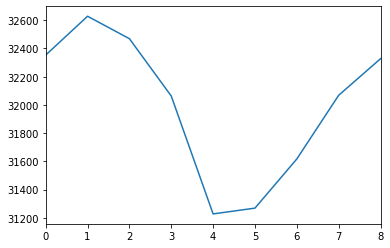

In [3]:
df['Выброшено загрязняющих атмосферу веществ - всего'].plot()

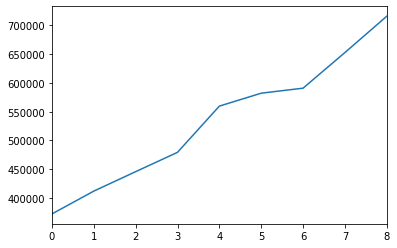

In [4]:
df['Объем затрат на охрану окружающей среды'].plot()

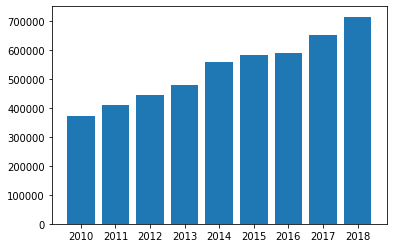

In [10]:
x = np.arange(9)

def millions(x, pos):
    return int(x) 
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x,df['Объем затрат на охрану окружающей среды'],label=['Затраты'])
plt.xticks(x, ('2010', '2011', '2012', '2013','2014','2015','2016','2017','2018'))
plt.show()

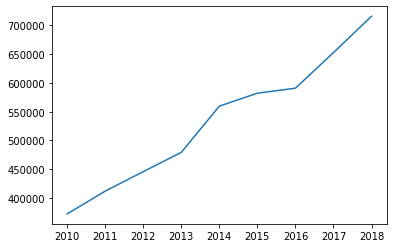

In [12]:
x = np.arange(9)
def millions(x, pos):
    return int(x)
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.plot(x,df['Объем затрат на охрану окружающей среды'])
plt.xticks(x, ('2010', '2011', '2012', '2013','2014','2015','2016','2017','2018'))
plt.show()

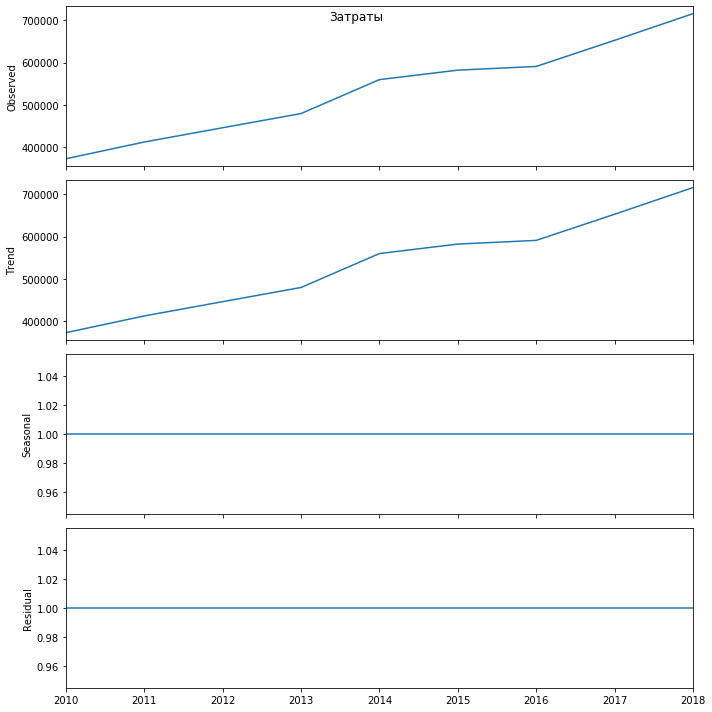

In [15]:
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['Год'].astype('str')])
df.set_index(dates, inplace=True)
result = seasonal_decompose(df['Объем затрат на охрану окружающей среды'], model='multiplicative')
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Затраты')
plt.show()

Text(0.5, 1.0, 'диоксид углерода')

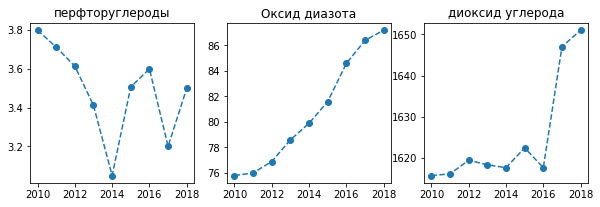

In [44]:
plt.figure()
plt.subplot(3,3,1)
plt.plot(df['Год'],df['перфторуглероды (ПФУ)'],'o--')
plt.title('перфторуглероды')
plt.subplot(3,3,2)
plt.plot(df['Год'],df['оксид диазота (N2O)'],'o--')
plt.title('Оксид диазота')
plt.subplot(3,3,3)
plt.plot(df['Год'],df['диоксид углерода (СО2)'],'o--')
plt.title('диоксид углерода')


Text(0.5, 1.0, 'гексафторид серы (SF6)')

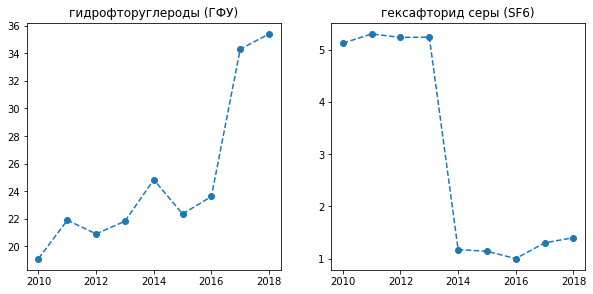

In [46]:
plt.subplot(2,2,1)
plt.plot(df['Год'],df['гидрофторуглероды (ГФУ)'],'o--')
plt.title('гидрофторуглероды (ГФУ)')
plt.subplot(2,2,2)
plt.plot(df['Год'],df['гексафторид серы (SF6)'],'o--')
plt.title('гексафторид серы (SF6)')

In [47]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://gks.ru/free_doc/new_site/oxrana/tab-graf.files/image001.png")

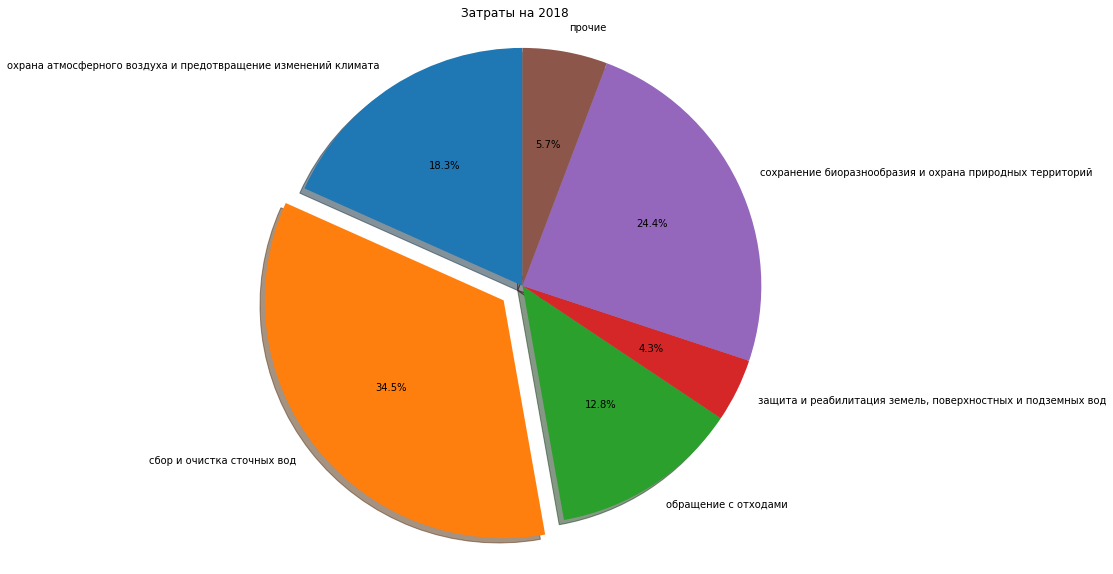

In [48]:
labels = df.columns[7],df.columns[8],df.columns[9],df.columns[10],df.columns[11],df.columns[12]
sizes = [df.iloc[8,7] * 100 / df.iloc[8, 6],df.iloc[8,8] * 100 / df.iloc[8, 6],df.iloc[8,9] * 100 / df.iloc[8, 6],df.iloc[8,10] * 100 / df.iloc[8, 6] ,df.iloc[8,12] * 100 / df.iloc[8, 6] ,df.iloc[8,11] * 100 / df.iloc[8, 6] ]
explode = (0, 0.1, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Затраты на 2018')
plt.show()

### Максимальные отклонения от нормы

In [49]:

display(df1.loc[df1['отклонение от нормы Январь'] == -5.9][['Unnamed: 1','отклонение от нормы Январь']])
display(df1.loc[df1['отклонение от нормы Июль'] == -1.3][['Unnamed: 1','отклонение от нормы Июль']])
display(df1.loc[df1['отклонение от нормы Январь'] == 8.9][['Unnamed: 1','отклонение от нормы Январь']])
display(df1.loc[df1['отклонение от нормы Июль'] == 4.4][['Unnamed: 1','отклонение от нормы Июль']])

,Unnamed: 1,отклонение от нормы Январь
73,Алтайский край,-5.9


,Unnamed: 1,отклонение от нормы Июль
74,Красноярский край,-1.3


,Unnamed: 1,отклонение от нормы Январь
22,Ненецкий автономный округ,8.9


,Unnamed: 1,отклонение от нормы Июль
27,Мурманская область,4.4
